In [11]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import missingno as msno

pd.set_option('display.max_rows', None)  # 모든 행을 출력
pd.set_option('display.max_columns', None)  # 모든 열을 출력


In [75]:
train = pd.read_csv("train_last_1.csv")
test = pd.read_csv("test_last_1.csv")

### 랜덤

In [76]:
random_seed = 153774
np.random.seed(random_seed)

In [77]:

# '?' 값을 랜덤한 문자열로 대체
train['Weight_in_gms'] = train['Weight_in_gms'].replace('?', str(np.random.randint(1000, 41)))
test['Weight_in_gms'] = test['Weight_in_gms'].replace('?', str(np.random.randint(1000, 4001)))

# 결측치를 랜덤한 정수로 대체
train['Weight_in_gms'].fillna(np.random.randint(1000, 4001), inplace=True)
test['Weight_in_gms'].fillna(np.random.randint(1000, 4001), inplace=True)


# 데이터 유형을 정수로 변환
train['Weight_in_gms'] = train['Weight_in_gms'].astype('int64')
test['Weight_in_gms'] = test['Weight_in_gms'].astype('int64')





# Prior_purchases

test['Prior_purchases'].fillna(test['Prior_purchases']==0, inplace=True)  
train['Prior_purchases'].fillna(train['Prior_purchases']==0, inplace=True)  








# Discount_offered  ?

#train



# 결측치를 60%는 11에서 60 사이의 랜덤한 값으로, 40%는 2~10 으로 채우기
total_missing = train['Discount_offered'].isnull().sum()  # 결측치의 총 개수
num_rows_to_fill_random = int(total_missing * 0.60)  # 결측치 중 60%에 해당하는 행 수 계산

# 결측치 중 60%에 해당하는 행을 11에서 60 사이의 랜덤한 값으로 채우기
random_indices = np.random.choice(train[train['Discount_offered'].isnull()].index, size=num_rows_to_fill_random, replace=False)
random_values = np.random.randint(11, 61, size=num_rows_to_fill_random)
train.loc[random_indices, 'Discount_offered'] = random_values

# 나머지 결측치 중 40%를 10으로 채우기
num_rows_to_fill_ten = total_missing - num_rows_to_fill_random
train['Discount_offered'].fillna(10, inplace=True)

# test 결측치를 랜덤 하게

# 결측치 인덱스에 랜덤한 값(11에서 65 사이의 정수)을 할당
missing_indices3 = test['Discount_offered'].isnull()
test.loc[missing_indices3, 'Discount_offered'] = np.random.randint(1, 15, size=missing_indices3.sum())
#test.loc[missing_indices, 'Discount_offered'] = np.random.randint(2, 66, size=len(test[test['Discount_offered'].isnull()].index))






# Customer_care_calls



# 결측치 인덱스에 랜덤한 값(2에서 7 사이의 정수)을 할당
missing_indices = train['Customer_care_calls'].isnull()
train.loc[missing_indices, 'Customer_care_calls'] = np.random.randint(2, 7, size=missing_indices.sum())
#test.loc[missing_indices, 'Discount_offered'] = np.random.randint(2, 7, size=len(test[test['Discount_offered'].isnull()].index))
# 결측치 인덱스에 랜덤한 값(11에서 65 사이의 정수)을 할당
missing_indices1 = test['Customer_care_calls'].isnull()
test.loc[missing_indices1, 'Customer_care_calls'] = np.random.randint(2, 7, size=missing_indices1.sum())
#test.loc[missing_indices, 'Discount_offered'] = np.random.randint(2, 7, size=len(test[test['Discount_offered'].isnull()].index))


# 최빈값으로 채우기 
train['Mode_of_Shipment'].replace('?', 'Ship', inplace=True)
test['Mode_of_Shipment'].replace('?', 'Ship', inplace=True)

train['Product_importance'].replace('?', 'medium', inplace=True)
test['Product_importance'].replace('?', 'high', inplace=True)

ValueError: low >= high

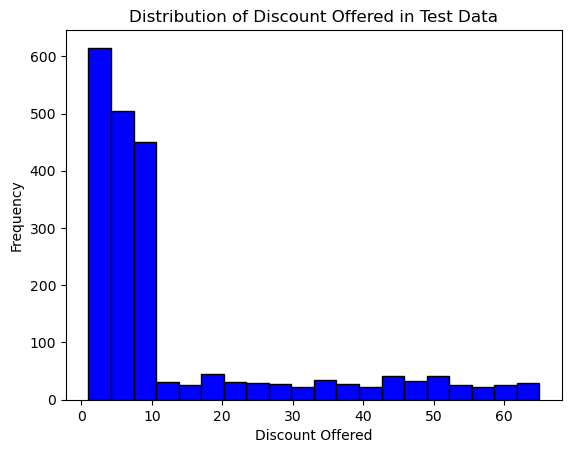

In [78]:
import matplotlib.pyplot as plt

# 'Discount_offered' 열의 분포를 히스토그램으로 그리기
plt.hist(test['Discount_offered'], bins=20, color='blue', edgecolor='black')

# 그래프 제목과 축 레이블 설정
plt.title('Distribution of Discount Offered in Test Data')
plt.xlabel('Discount Offered')
plt.ylabel('Frequency')

# 그래프 표시
plt.show()


In [79]:
test['Discount_offered'].describe()



count    2085.000000
mean       13.282014
std        15.835045
min         1.000000
25%         4.000000
50%         7.000000
75%        10.000000
max        65.000000
Name: Discount_offered, dtype: float64

In [39]:
# 'Weight_in_gms' 열의 값을 100의 배수로 변경
train['Weight_in_gms'] = ((train['Weight_in_gms'] - 1) // 100 + 1) * 100
test['Weight_in_gms'] = ((test['Weight_in_gms'] - 1) // 100 + 1) * 100

In [80]:
one_hot_train =pd.get_dummies(train)
one_hot_test =pd.get_dummies(test)

In [81]:
one_hot_train.to_csv('train_09_15_1.csv', index=False)
one_hot_test.to_csv('test_09_15_1.csv', index=False)

16642  
2457276457-67  
8568 - 68  
9546 -676  
74555 - 교차검증  0.6779  
XGBoost 최적 하이퍼파라미터: {'learning_rate': 0.059, 'max_depth': 4,   'n_estimators': 45}  
XGBoost 최고 정확도: 0.681459109366086  
xgb_best_model

7755 - 0.675

### Discount_offered 

- train
    결측치 중에는 2097개 정답 1034 개는 오답
    오답은 40% 정답은 60%


- test
     1915개 결측치 ? 없음

- 특성 
     10 이상 값은 모두 정답으로 봐도 무방
     test 1915개의 결측치 위치를 정하기 어려움
     정답과 밀접한 관계도를 가지기 때문에 가장 중요한 데이터

- 랜덤 코드에 넣음

In [377]:
# ? 값중에 답이 1인 개수
len(train[train['Discount_offered'].isnull() & (train['Reached.on.Time_Y.N'] == 0)])

# ? 인값
test['Discount_offered'].isnull().sum()



1915

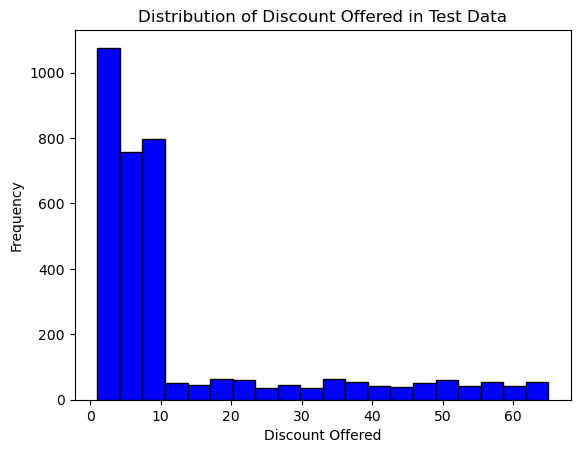

In [378]:
import matplotlib.pyplot as plt

# 'Discount_offered' 열의 분포를 히스토그램으로 그리기
plt.hist(train['Discount_offered'], bins=20, color='blue', edgecolor='black')

# 그래프 제목과 축 레이블 설정
plt.title('Distribution of Discount Offered in Test Data')
plt.xlabel('Discount Offered')
plt.ylabel('Frequency')

# 그래프 표시
plt.show()


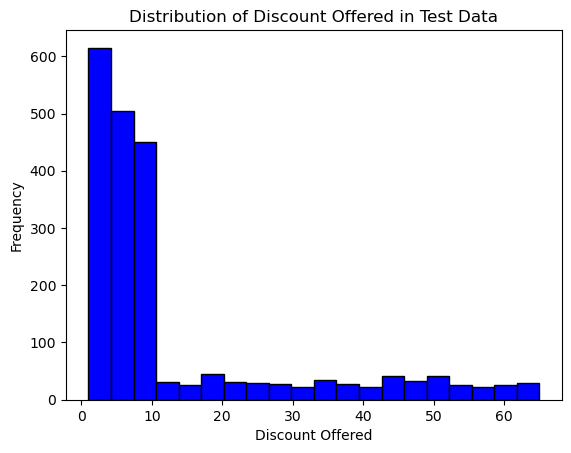

In [379]:
import matplotlib.pyplot as plt

# 'Discount_offered' 열의 분포를 히스토그램으로 그리기
plt.hist(test['Discount_offered'], bins=20, color='blue', edgecolor='black')

# 그래프 제목과 축 레이블 설정
plt.title('Distribution of Discount Offered in Test Data')
plt.xlabel('Discount Offered')
plt.ylabel('Frequency')

# 그래프 표시
plt.show()


### Weight_in_gms  
- train
   ? = 446  개중에 답인값 294개 오답 152개
   오답 35% 정답 65%
   
- train  매우 고르게 분포되어 있음

- test 

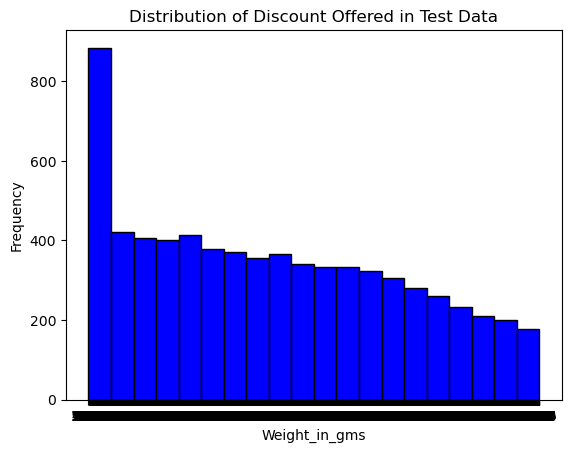

In [356]:
import matplotlib.pyplot as plt

# 'Discount_offered' 열의 분포를 히스토그램으로 그리기
plt.hist(train['Weight_in_gms'], bins=20, color='blue', edgecolor='black')

# 그래프 제목과 축 레이블 설정
plt.title('Distribution of Discount Offered in Test Data')
plt.xlabel('Weight_in_gms')
plt.ylabel('Frequency')

# 그래프 표시
plt.show()


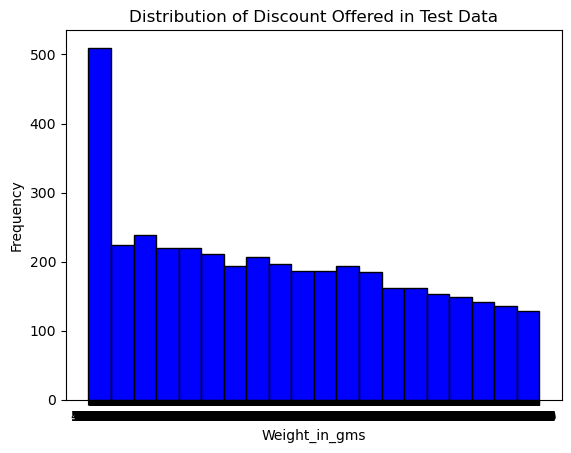

In [357]:
import matplotlib.pyplot as plt

# 'Discount_offered' 열의 분포를 히스토그램으로 그리기
plt.hist(test['Weight_in_gms'], bins=20, color='blue', edgecolor='black')

# 그래프 제목과 축 레이블 설정
plt.title('Distribution of Discount Offered in Test Data')
plt.xlabel('Weight_in_gms')
plt.ylabel('Frequency')

# 그래프 표시
plt.show()


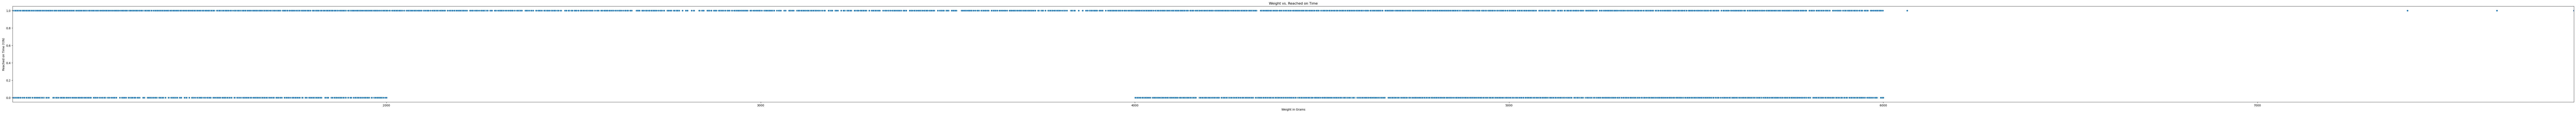

In [205]:
import matplotlib.pyplot as plt
import seaborn as sns

# train 데이터프레임에서 'Weight_in_gms'와 'Reached.on.Time_Y.N' 컬럼 선택
weight_column = 'Weight_in_gms'
reached_column = 'Reached.on.Time_Y.N'

# 산점도 그래프 그리기
plt.figure(figsize=(160, 6))  # 그래프 크기 지정 (선택 사항)

sns.scatterplot(data=train, x=weight_column, y=reached_column)
plt.title('Weight vs. Reached on Time')  # 그래프 제목 지정 (선택 사항)
plt.xlabel('Weight in Grams')  # x 축 레이블 지정 (선택 사항)
plt.ylabel('Reached on Time (Y/N)')  # y 축 레이블 지정 (선택 사항)

# x 축 범위 설정
plt.xlim(train[weight_column].min(), train[weight_column].max())

plt.show()  # 그래프 출력




# 전처리 오류,,ㅠㅠㅠ

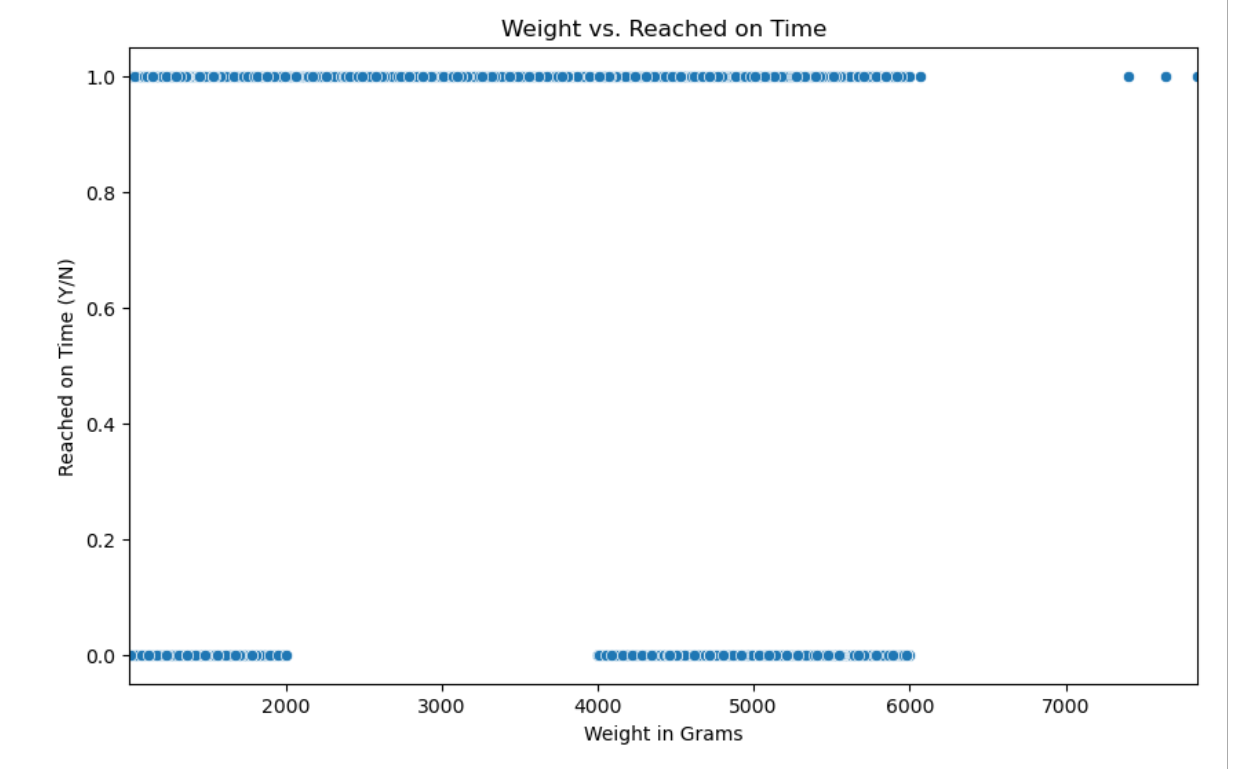

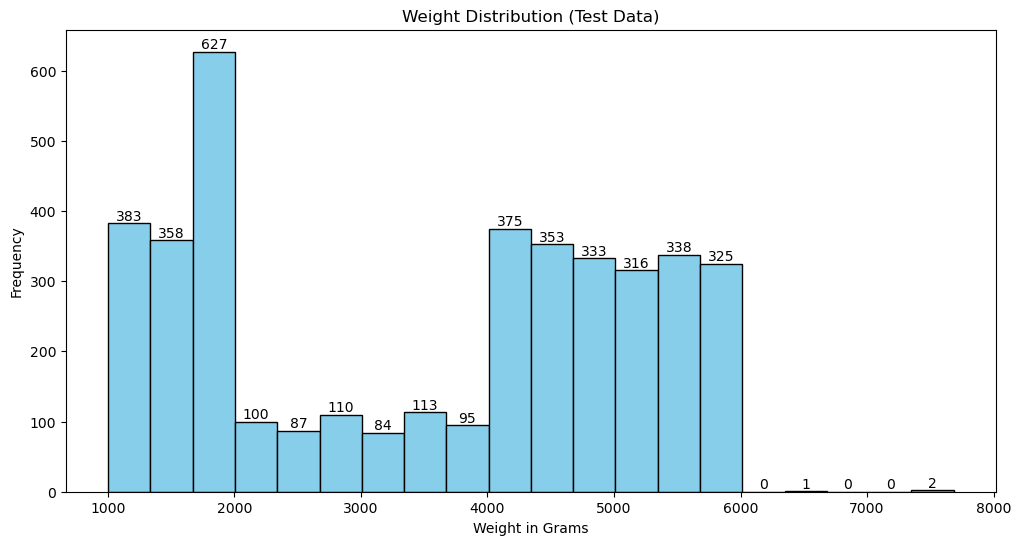

In [206]:
import matplotlib.pyplot as plt
import numpy as np

# 'Weight_in_gms' 컬럼의 분포를 히스토그램으로 그리기
plt.figure(figsize=(12, 6))  # 그래프 크기 설정 (선택 사항)

# 히스토그램 그리기
n, bins, patches = plt.hist(test['Weight_in_gms'], bins=20, color='skyblue', edgecolor='black')
plt.title('Weight Distribution (Test Data)')  # 그래프 제목 설정 (선택 사항)
plt.xlabel('Weight in Grams')  # x 축 레이블 설정 (선택 사항)
plt.ylabel('Frequency')  # y 축 레이블 설정 (선택 사항)

# 각 구간의 빈도수 값 표시
for i in range(len(bins) - 1):
    plt.text(bins[i] + (bins[i + 1] - bins[i]) / 2, n[i], str(int(n[i])), ha='center', va='bottom')

plt.show()  # 그래프 출력


### Prior_purchases

- train 950개의 결측치 ? 없음
    541개 정답 409개 오답  43%오답 57% 정답
- test 결측치 = 367 개  ? 없음
    

    
- 정답과 큰 관계도 없어서
    비율에 따라 값주거나 - 0.68
    삭제하거나 - 
    0으로 채우거나



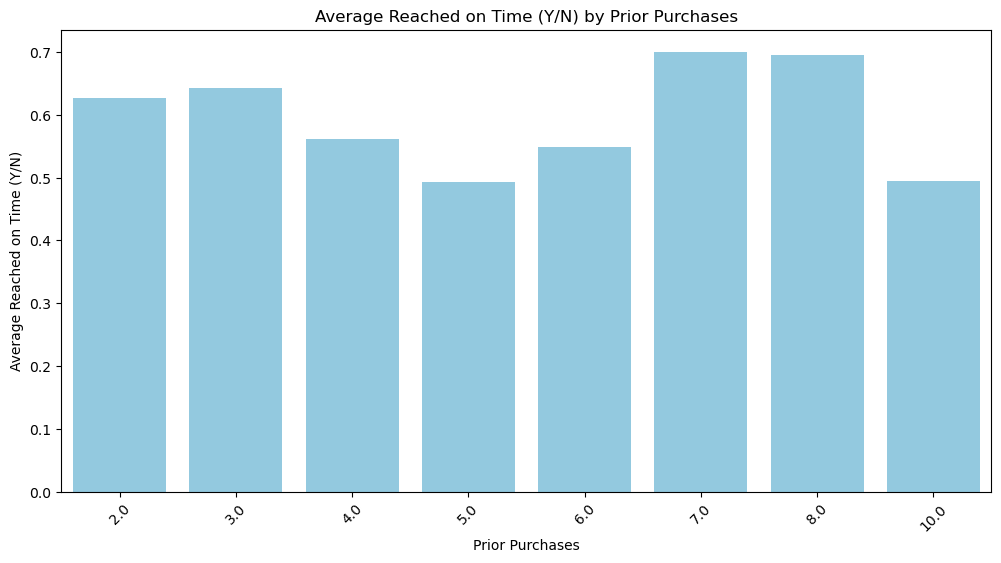

In [358]:
import matplotlib.pyplot as plt
import seaborn as sns

# 'Prior_purchases' 값 범주별로 'Reached.on.Time_Y.N' 값의 평균 계산
grouped_data = train.groupby('Prior_purchases')['Reached.on.Time_Y.N'].mean().reset_index()

# 막대 그래프 그리기
plt.figure(figsize=(12, 6))  # 그래프 크기 설정 (선택 사항)

sns.barplot(data=grouped_data, x='Prior_purchases', y='Reached.on.Time_Y.N', color='skyblue')
plt.title('Average Reached on Time (Y/N) by Prior Purchases')  # 그래프 제목 설정 (선택 사항)
plt.xlabel('Prior Purchases')  # x 축 레이블 설정 (선택 사항)
plt.ylabel('Average Reached on Time (Y/N)')  # y 축 레이블 설정 (선택 사항)

plt.xticks(rotation=45)  # x 축 눈금 라벨 회전 (선택 사항)

plt.show()  # 그래프 출력


train.info()

#### Customer_care_calls

- train
    결측치 1576 개중
    987 정답 62%  
    589 오답 48%
- test
    결측치 = 856 개  
    
    09_13 트레인과 테스트가 황금 비율이라 결측치는 0으로 채워버리자
    09_15 황금비율이라 랜덤으로 결정
    0으로 채워도 될거 같음 

In [359]:
len(train[train['Customer_care_calls'].isnull() & (train['Reached.on.Time_Y.N'] == 1)])


987

In [360]:
len(train[train['Customer_care_calls'].isnull() & (train['Reached.on.Time_Y.N'] == 0)])


589

In [361]:
987 + 589

1576

In [362]:
987/1576

0.626269035532995

In [447]:
import matplotlib.pyplot as plt
import seaborn as sns

# 'Prior_purchases' 값 범주별로 'Reached.on.Time_Y.N' 값의 평균 계산
grouped_data = train.groupby('Customer_care_calls')['Reached.on.Time_Y.N'].mean().reset_index()

# 막대 그래프 그리기
plt.figure(figsize=(12, 6))  # 그래프 크기 설정 (선택 사항)

sns.barplot(data=grouped_data, x='Customer_care_calls', y='Reached.on.Time_Y.N', color='skyblue')
plt.title('Average Reached on Time (Y/N) by Customer_care_calls')  # 그래프 제목 설정 (선택 사항)
plt.xlabel('Customer_care_calls')  # x 축 레이블 설정 (선택 사항)
plt.ylabel('Average Reached on Time (Y/N)')  # y 축 레이블 설정 (선택 사항)

plt.xticks(rotation=45)  # x 축 눈금 라벨 회전 (선택 사항)

plt.show()  # 그래프 출력


AttributeError: 'NoneType' object has no attribute 'groupby'

In [369]:
import matplotlib.pyplot as plt
import seaborn as sns

# 'Prior_purchases' 값 범주별로 'Reached.on.Time_Y.N' 값의 평균 계산
grouped_data = .groupby('Customer_care_calls')['Reached.on.Time_Y.N'].mean().reset_index()

# 막대 그래프 그리기
plt.figure(figsize=(12, 6))  # 그래프 크기 설정 (선택 사항)

sns.barplot(data=grouped_data, x='Customer_care_calls', y='Reached.on.Time_Y.N', color='skyblue')
plt.title('Average Reached on Time (Y/N) by Customer_care_calls')  # 그래프 제목 설정 (선택 사항)
plt.xlabel('Customer_care_calls')  # x 축 레이블 설정 (선택 사항)
plt.ylabel('Average Reached on Time (Y/N)')  # y 축 레이블 설정 (선택 사항)

plt.xticks(rotation=45)  # x 축 눈금 라벨 회전 (선택 사항)

plt.show()  # 그래프 출력


SyntaxError: invalid syntax (1265674337.py, line 5)

### Mode_of_Shipment

- train  
   ? 의 Reached.on.Time_Y.N 이 1인 개수 
   373개 의 결측치가 모두 정답이다

In [370]:
# 최빈값으로 채우기 
train['Mode_of_Shipment'].replace('?', 'Ship', inplace=True)
test['Mode_of_Shipment'].replace('?', 'Ship', inplace=True)


###  Product_importance 

- train
    결측치 97 - 57개 가 정답 40개가 오답
    비율 58% 정답  41% 오답  
    그러나 답과는 그렇게 관계가 없어서 midium이나 low 아무대나 배치하면 될듯
    
- test  결측치 없으나    ? 80개
    하이가 많이 비어보여서 하이 채우겟음

In [371]:
train['Product_importance'].replace('?', 'medium', inplace=True)
test['Product_importance'].replace('?', 'high', inplace=True)

In [222]:
one_hot_train =pd.get_dummies(train)
one_hot_test =pd.get_dummies(test)

In [223]:
one_hot_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6999 entries, 0 to 6998
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Customer_care_calls        6999 non-null   float64
 1   Customer_rating            6999 non-null   int64  
 2   Cost_of_the_Product        6999 non-null   int64  
 3   Prior_purchases            6999 non-null   float64
 4   Discount_offered           6999 non-null   float64
 5   Weight_in_gms              6999 non-null   int64  
 6   Reached.on.Time_Y.N        6999 non-null   int64  
 7   Warehouse_block_A          6999 non-null   uint8  
 8   Warehouse_block_B          6999 non-null   uint8  
 9   Warehouse_block_C          6999 non-null   uint8  
 10  Warehouse_block_D          6999 non-null   uint8  
 11  Warehouse_block_F          6999 non-null   uint8  
 12  Mode_of_Shipment_Flight    6999 non-null   uint8  
 13  Mode_of_Shipment_Road      6999 non-null   uint8

In [224]:
one_hot_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Customer_care_calls        4000 non-null   float64
 1   Customer_rating            4000 non-null   int64  
 2   Cost_of_the_Product        4000 non-null   int64  
 3   Prior_purchases            4000 non-null   float64
 4   Discount_offered           4000 non-null   float64
 5   Weight_in_gms              4000 non-null   int64  
 6   Warehouse_block_A          4000 non-null   uint8  
 7   Warehouse_block_B          4000 non-null   uint8  
 8   Warehouse_block_C          4000 non-null   uint8  
 9   Warehouse_block_D          4000 non-null   uint8  
 10  Warehouse_block_F          4000 non-null   uint8  
 11  Mode_of_Shipment_Flight    4000 non-null   uint8  
 12  Mode_of_Shipment_Road      4000 non-null   uint8  
 13  Mode_of_Shipment_Ship      4000 non-null   uint8

# 코드 간소화

In [443]:
import numpy as np

# Weight_in_gms 결측치 처리
train['Weight_in_gms'] = train['Weight_in_gms'].replace('?', str(np.random.randint(1000, 6001)))
test['Weight_in_gms'] = test['Weight_in_gms'].replace('?', str(np.random.randint(1000, 6001)))
train['Weight_in_gms'].fillna(np.random.randint(1000, 6001), inplace=True)
test['Weight_in_gms'].fillna(np.random.randint(1000, 6001), inplace=True)
train['Weight_in_gms'] = train['Weight_in_gms'].astype('int64')
test['Weight_in_gms'] = test['Weight_in_gms'].astype('int64')

# Prior_purchases 결측치 처리
q57_train = train['Prior_purchases'].quantile(0.57)
q43_train = train['Prior_purchases'].quantile(0.43)
train.loc[train['Prior_purchases'].isnull(), 'Prior_purchases'] = 7
train['Prior_purchases'].fillna(q43_train, inplace=True)

q57_test = test['Prior_purchases'].quantile(0.57)
q43_test = test['Prior_purchases'].quantile(0.43)
test.loc[test['Prior_purchases'].isnull(), 'Prior_purchases'] = 7
test['Prior_purchases'].fillna(q43_test, inplace=True)

# Discount_offered 결측치 처리
q60_train = train['Discount_offered'].quantile(0.60)
q40_train = train['Discount_offered'].quantile(0.40)
train.loc[train['Discount_offered'].isnull(), 'Discount_offered'] = np.random.randint(11, 66, size=train['Discount_offered'].isnull().sum())
train['Discount_offered'].fillna(q40_train, inplace=True)

missing_indices_test = test['Discount_offered'].isnull()
test.loc[missing_indices_test, 'Discount_offered'] = np.random.randint(2, 66, size=missing_indices_test.sum())

# Customer_care_calls 결측치 처리
missing_indices_train = train['Customer_care_calls'].isnull()
train.loc[missing_indices_train, 'Customer_care_calls'] = np.random.randint(2, 66, size=missing_indices_train.sum())

missing_indices_test = test['Customer_care_calls'].isnull()
test.loc[missing_indices_test, 'Customer_care_calls'] = np.random.randint(2, 66, size=missing_indices_test.sum())


TypeError: 'NoneType' object is not subscriptable

In [235]:
one_hot_train =pd.get_dummies(train)
one_hot_test =pd.get_dummies(test)

In [236]:
one_hot_train.to_csv('train_09_15_1.csv', index=False)
one_hot_test.to_csv('test_09_15_1.csv', index=False)

In [445]:
one_hot_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6999 entries, 0 to 6998
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Customer_care_calls        6999 non-null   float64
 1   Customer_rating            6999 non-null   int64  
 2   Cost_of_the_Product        6999 non-null   int64  
 3   Prior_purchases            6999 non-null   float64
 4   Discount_offered           6999 non-null   float64
 5   Weight_in_gms              6999 non-null   int64  
 6   Reached.on.Time_Y.N        6999 non-null   int64  
 7   Warehouse_block_A          6999 non-null   uint8  
 8   Warehouse_block_B          6999 non-null   uint8  
 9   Warehouse_block_C          6999 non-null   uint8  
 10  Warehouse_block_D          6999 non-null   uint8  
 11  Warehouse_block_F          6999 non-null   uint8  
 12  Mode_of_Shipment_Flight    6999 non-null   uint8  
 13  Mode_of_Shipment_Road      6999 non-null   uint8

In [446]:
one_hot_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Customer_care_calls        4000 non-null   float64
 1   Customer_rating            4000 non-null   int64  
 2   Cost_of_the_Product        4000 non-null   int64  
 3   Prior_purchases            4000 non-null   float64
 4   Discount_offered           4000 non-null   float64
 5   Weight_in_gms              4000 non-null   int64  
 6   Warehouse_block_A          4000 non-null   uint8  
 7   Warehouse_block_B          4000 non-null   uint8  
 8   Warehouse_block_C          4000 non-null   uint8  
 9   Warehouse_block_D          4000 non-null   uint8  
 10  Warehouse_block_F          4000 non-null   uint8  
 11  Mode_of_Shipment_Flight    4000 non-null   uint8  
 12  Mode_of_Shipment_Road      4000 non-null   uint8  
 13  Mode_of_Shipment_Ship      4000 non-null   uint8